In [1]:
import numpy as np
import tensorflow as tf
import tensorflow_datasets as tfds

In [2]:
print(len(tfds.list_builders()))
print(tfds.list_builders())

413
['abstract_reasoning', 'accentdb', 'aeslc', 'aflw2k3d', 'ag_news_subset', 'ai2_arc', 'ai2_arc_with_ir', 'amazon_us_reviews', 'anli', 'answer_equivalence', 'arc', 'asqa', 'asset', 'assin2', 'asu_table_top_converted_externally_to_rlds', 'austin_buds_dataset_converted_externally_to_rlds', 'austin_sailor_dataset_converted_externally_to_rlds', 'austin_sirius_dataset_converted_externally_to_rlds', 'bair_robot_pushing_small', 'bc_z', 'bccd', 'beans', 'bee_dataset', 'beir', 'berkeley_autolab_ur5', 'berkeley_cable_routing', 'berkeley_fanuc_manipulation', 'berkeley_gnm_cory_hall', 'berkeley_gnm_recon', 'berkeley_gnm_sac_son', 'berkeley_mvp_converted_externally_to_rlds', 'berkeley_rpt_converted_externally_to_rlds', 'big_patent', 'bigearthnet', 'billsum', 'binarized_mnist', 'binary_alpha_digits', 'ble_wind_field', 'blimp', 'booksum', 'bool_q', 'bot_adversarial_dialogue', 'bridge', 'bucc', 'c4', 'c4_wsrs', 'caltech101', 'caltech_birds2010', 'caltech_birds2011', 'cardiotox', 'cars196', 'cassava'

In [3]:
data, info = tfds.load('cifar10', with_info=True)
print(info)

tfds.core.DatasetInfo(
    name='cifar10',
    full_name='cifar10/3.0.2',
    description="""
    The CIFAR-10 dataset consists of 60000 32x32 colour images in 10 classes, with 6000 images per class. There are 50000 training images and 10000 test images.
    """,
    homepage='https://www.cs.toronto.edu/~kriz/cifar.html',
    data_dir='C:\\Users\\euiso\\tensorflow_datasets\\cifar10\\3.0.2',
    file_format=tfrecord,
    download_size=162.17 MiB,
    dataset_size=132.40 MiB,
    features=FeaturesDict({
        'id': Text(shape=(), dtype=string),
        'image': Image(shape=(32, 32, 3), dtype=uint8),
        'label': ClassLabel(shape=(), dtype=int64, num_classes=10),
    }),
    supervised_keys=('image', 'label'),
    disable_shuffling=False,
    splits={
        'test': <SplitInfo num_examples=10000, num_shards=1>,
        'train': <SplitInfo num_examples=50000, num_shards=1>,
    },
    citation="""@TECHREPORT{Krizhevsky09learningmultiple,
        author = {Alex Krizhevsky},
        t

In [4]:
ds_train = data['train']
print(len(ds_train))

ds_train = ds_train.map(lambda x: (x['image'], x['label']))
ds_train = ds_train.filter(lambda x, y: y is not None)
ds_train = ds_train.shuffle(12000).batch(60000)
batch = next(iter(ds_train))
print(batch[0].shape, batch[1].shape)
print(type(batch[0]), type(batch[1]))

x_train , y_train = batch
print(x_train.shape, y_train.shape)
print(type(x_train), type(y_train))

50000
(50000, 32, 32, 3) (50000,)
<class 'tensorflow.python.framework.ops.EagerTensor'> <class 'tensorflow.python.framework.ops.EagerTensor'>
(50000, 32, 32, 3) (50000,)
<class 'tensorflow.python.framework.ops.EagerTensor'> <class 'tensorflow.python.framework.ops.EagerTensor'>


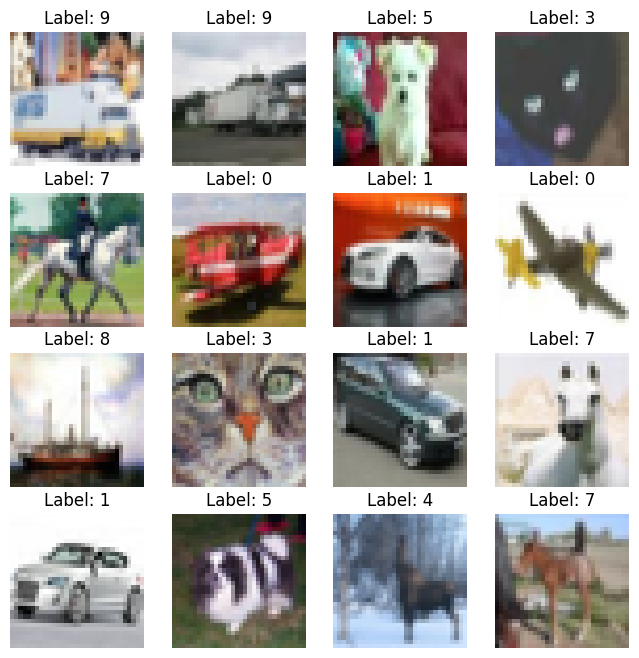

In [5]:
import matplotlib.pyplot as plt
import random

random_idx = np.random.randint(0, len(x_train), size=16)

plt.figure(figsize=(8, 8))
for i, idx in enumerate(random_idx):
    plt.subplot(4, 4, i+1)
    plt.imshow(x_train[idx])
    plt.title(f"Label: {y_train[idx]}")
    plt.axis("off")

plt.show()

In [6]:
ds_test = data['test']
print(len(ds_test))

ds_test = ds_test.map(lambda x: (x['image'], x['label']))
ds_test = ds_test.shuffle(2000).batch(10000)
batch = next(iter(ds_test))
print(batch[0].shape, batch[1].shape)
print(type(batch[0]), type(batch[1]))

x_test , y_test = batch
print(x_test.shape, y_test.shape)
print(type(x_test), type(y_test))

10000
(10000, 32, 32, 3) (10000,)
<class 'tensorflow.python.framework.ops.EagerTensor'> <class 'tensorflow.python.framework.ops.EagerTensor'>
(10000, 32, 32, 3) (10000,)
<class 'tensorflow.python.framework.ops.EagerTensor'> <class 'tensorflow.python.framework.ops.EagerTensor'>


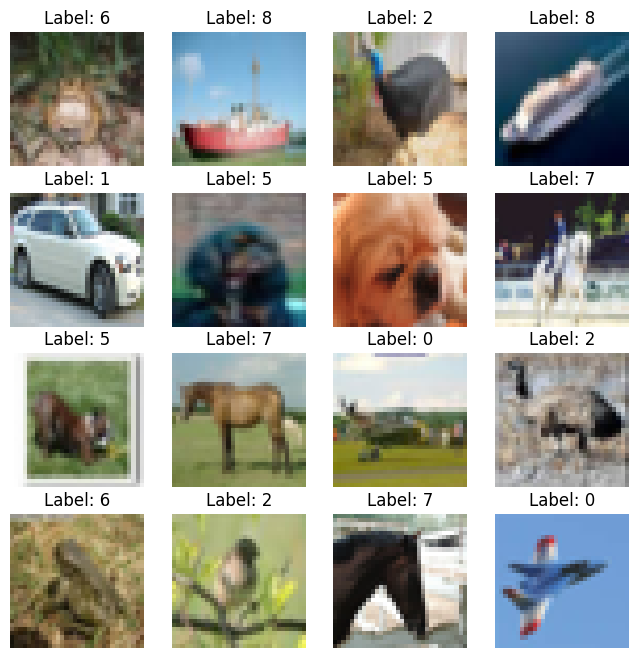

In [7]:
random_idx = np.random.randint(0, len(x_test), size=16)

plt.figure(figsize=(8, 8))
for i, idx in enumerate(random_idx):
    plt.subplot(4, 4, i+1)
    plt.imshow(x_test[idx])
    plt.title(f"Label: {y_test[idx]}")
    plt.axis("off")

plt.show()

In [8]:
from tensorflow.keras.utils import to_categorical

print(x_train.shape, type(x_train), y_train.shape, type(y_train))

x_train = np.array(x_train) / 255
x_test = np.array(x_test) /255

print(x_train.shape, type(x_train), y_train.shape, type(y_train))

y_train = to_categorical(np.array(y_train))
y_test = to_categorical(np.array(y_test))

(50000, 32, 32, 3) <class 'tensorflow.python.framework.ops.EagerTensor'> (50000,) <class 'tensorflow.python.framework.ops.EagerTensor'>
(50000, 32, 32, 3) <class 'numpy.ndarray'> (50000,) <class 'tensorflow.python.framework.ops.EagerTensor'>


In [9]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPooling2D, Dropout, BatchNormalization

model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', padding='same', input_shape=(32, 32, 3)))
model.add(Conv2D(32,(3, 3), activation='relu', padding='same'))
# model.add(MaxPooling2D(2, 2))
model.add(Dropout(0.2))

model.add(Conv2D(64, (3, 3), activation='relu', padding='same'))
model.add(Conv2D(64, (3, 3), activation='relu', padding='same'))
model.add(MaxPooling2D(2, 2))
model.add(Dropout(0.2))

model.add(Conv2D(128, (3, 3), activation='relu', padding='same'))
model.add(Conv2D(128, (3, 3), activation='relu', padding='same'))
model.add(MaxPooling2D(2, 2))
model.add(Dropout(0.2))
model.add(BatchNormalization())

model.add(Flatten())

model.add(Dense(512, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(10, activation='softmax'))

model.summary()

c:\Users\euiso\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\layers\convolutional\base_conv.py:99: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 32, 32, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 32, 32, 32)     │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 32, 32, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 32, 32, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 32, 32, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 16, 16, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 16, 16, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 16, 16, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 16, 16, 128)    │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 8, 8, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 8, 8, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 8, 8, 128)      │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 8192)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 512)            │     4,194,816 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │         5,130 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 4,487,466 (17.12 MB)

 Trainable params: 4,487,210 (17.12 MB)

 Non-trainable params: 256 (1.00 KB)

In [10]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['acc'])
history = model.fit(x_train, y_train, epochs=30, batch_size=64, validation_split=0.2)

Epoch 1/30
625/625 ━━━━━━━━━━━━━━━━━━━━ 109s 154ms/step - acc: 0.3987 - loss: 1.6816 - val_acc: 0.5831 - val_loss: 1.1864
Epoch 2/30
625/625 ━━━━━━━━━━━━━━━━━━━━ 116s 185ms/step - acc: 0.6258 - loss: 1.0533 - val_acc: 0.6763 - val_loss: 0.9025
Epoch 3/30
625/625 ━━━━━━━━━━━━━━━━━━━━ 116s 185ms/step - acc: 0.7007 - loss: 0.8445 - val_acc: 0.7126 - val_loss: 0.8375
Epoch 4/30
625/625 ━━━━━━━━━━━━━━━━━━━━ 116s 185ms/step - acc: 0.7547 - loss: 0.7001 - val_acc: 0.7373 - val_loss: 0.7710
Epoch 5/30
625/625 ━━━━━━━━━━━━━━━━━━━━ 115s 184ms/step - acc: 0.7936 - loss: 0.5860 - val_acc: 0.6661 - val_loss: 1.0679
Epoch 6/30
625/625 ━━━━━━━━━━━━━━━━━━━━ 116s 186ms/step - acc: 0.8216 - loss: 0.5040 - val_acc: 0.7412 - val_loss: 0.7852
Epoch 7/30
625/625 ━━━━━━━━━━━━━━━━━━━━ 114s 183ms/step - acc: 0.8517 - loss: 0.4155 - val_acc: 0.7544 - val_loss: 0.7330
Epoch 8/30
625/625 ━━━━━━━━━━━━━━━━━━━━ 114s 183ms/step - acc: 0.8704 - loss: 0.3626 - val_acc: 0.7642 - val_loss: 0.8018
Epoch 9/30
625/625 ━━━━━

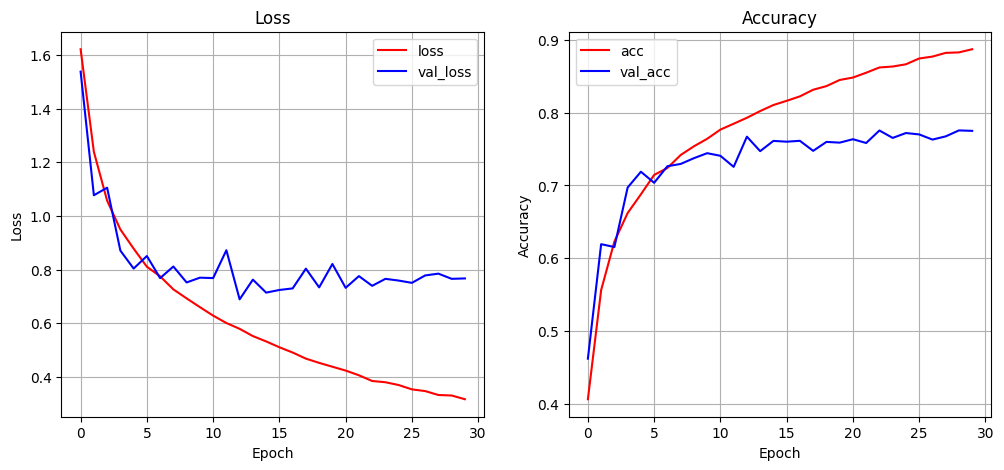

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='loss', color='red')
plt.plot(history.history['val_loss'], label='val_loss', color='blue')
plt.title('Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid()

plt.subplot(1, 2, 2)
plt.plot(history.history['acc'], label='acc', color='red')
plt.plot(history.history['val_acc'], label='val_acc', color='blue')
plt.title('Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.grid()

plt.show()

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - acc: 0.7689 - loss: 0.7592
313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step
[2.7111017e-05 1.0402658e-06 1.4854163e-01 6.4301127e-01 6.0254225e-04
 1.2089919e-01 8.6356468e-02 5.2115554e-04 3.9113911e-05 5.3162751e-07] 3


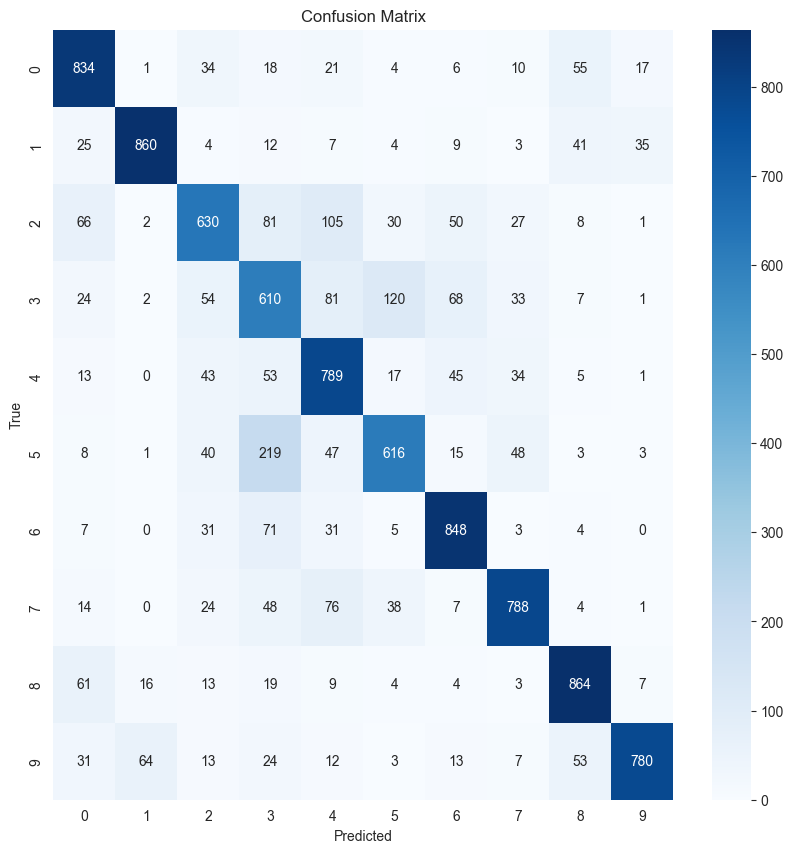

In [ ]:
from sklearn.metrics import confusion_matrix

model.evaluate(x_test, y_test)

pred_ys = model.predict(x_test)
print(pred_ys[0], np.argmax(pred_ys[0]))


plt.figure(figsize=(10, 10))
sns.set_style('whitegrid')
cm = confusion_matrix(np.argmax(y_test, axis=-1), np.argmax(pred_ys, axis=-1))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
# plt.legend()
# plt.grid()

plt.show()